In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
raw = pd.read_csv("./all.csv")
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37617 entries, 0 to 37616
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            37617 non-null  int64  
 1   Price            36924 non-null  float64
 2   Description      37148 non-null  object 
 3   Kind             37617 non-null  object 
 4   Location         37617 non-null  object 
 5   Size             37591 non-null  float64
 6   Parking_slot     13480 non-null  float64
 7   Air_condition    16624 non-null  float64
 8   Heater_shower    13175 non-null  float64
 9   Furnish          12529 non-null  float64
 10  Inner_toilet     9299 non-null   float64
 11  Size_total_bool  5539 non-null   float64
 12  Source           37617 non-null  object 
 13  ward             37617 non-null  object 
 14  district         37617 non-null  object 
 15  province         37617 non-null  object 
 16  lat              37617 non-null  float64
 17  lng         

In [73]:
raw['Price'].describe()

count     36924.000000
mean        117.376108
std        5962.017604
min           0.000000
25%           2.500000
50%          10.000000
75%          35.000000
max      900000.000000
Name: Price, dtype: float64

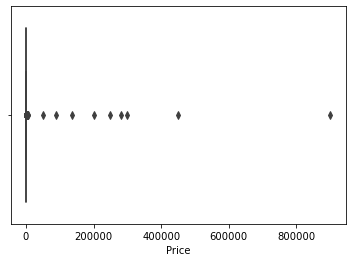

In [74]:
sns.boxplot(raw['Price'])

In [75]:
raw['Size'].describe()

count      37591.000000
mean         161.700537
std         5419.244789
min            0.000000
25%           20.000000
50%           50.000000
75%          100.000000
max      1000000.000000
Name: Size, dtype: float64

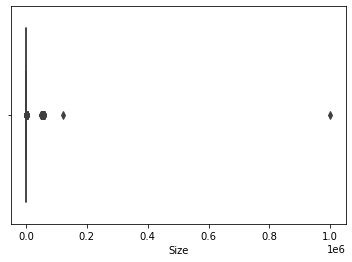

In [76]:
sns.boxplot(raw['Size'])

In [77]:
data = raw.fillna(0)
data = data[(data['Price'] <= 10) & (data['Price'] >= 1)]
# data = data[(data['Size'] <= 50) & (data['Size'] > 0)]

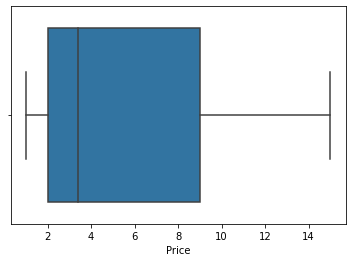

In [78]:
sns.boxplot(data['Price'])

In [79]:
data['Price'].describe()

count    22525.000000
mean         5.468786
std          4.203776
min          1.000000
25%          2.000000
50%          3.400000
75%          9.000000
max         15.000000
Name: Price, dtype: float64

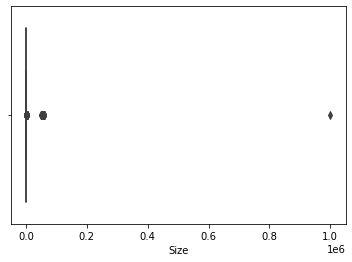

In [80]:
sns.boxplot(data['Size'])

In [81]:
data['Size'].describe()

count      22525.000000
mean         159.132915
std         6942.724221
min            0.000000
25%           20.000000
50%           30.000000
75%           57.000000
max      1000000.000000
Name: Size, dtype: float64

In [82]:
price_per_m2 = data['Price'] / data['Size']
data['Price_per_m2'] = price_per_m2
data['Price_per_m2'].describe()

count    2.252500e+04
mean              inf
std               NaN
min      2.000000e-06
25%      9.722222e-02
50%      1.150000e-01
75%      1.538462e-01
max               inf
Name: Price_per_m2, dtype: float64

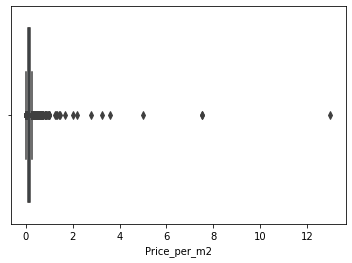

In [83]:
sns.boxplot(data['Price_per_m2'])

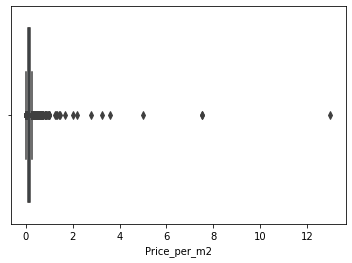

In [84]:
# data = data[(data['Price_per_m2'] <= 0.3) & (data['Price_per_m2'] > 0)]
sns.boxplot(data['Price_per_m2'])

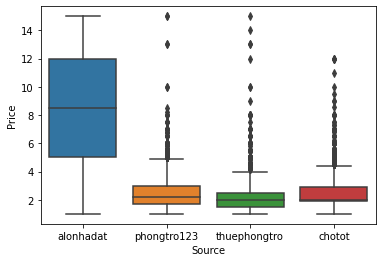

In [85]:
sns.boxplot(x='Source', y='Price', data=data)

In [87]:
data_categorical = data[['Kind', 'Source']]
data_float = data.select_dtypes(['float64'])
data_categorical_one_hot = pd.get_dummies(data_categorical)
data_processed = pd.concat([data_float, data_categorical_one_hot], axis=1)
data_processed = data_processed[data_processed['Source_alonhadat'] == 0]
data_processed = data_processed.drop(['Source_alonhadat'], axis=1)
data_processed = data_processed.drop(['Size_total_bool'], axis=1)
data_processed = data_processed.drop(['Price_per_m2'], axis=1)
data_processed = data_processed.drop(['lat', 'lng'], axis=1)
data_processed

,Price,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,dist,num_hospital,num_building,num_school,Kind_CCMN,Kind_Chung cư,Kind_Homestay,Kind_Phòng trọ,Source_chotot,Source_phongtro123,Source_thuephongtro
25720,4.5,35.0,1.0,1.0,1.0,1.0,1.0,0.0,5.995406,0.0,0.0,1.0,1,0,0,0,0,1,0
25721,1.8,22.0,1.0,0.0,1.0,0.0,0.0,0.0,2.975723,0.0,10.0,1.0,0,0,0,1,0,1,0
25722,2.5,18.0,1.0,0.0,1.0,1.0,0.0,0.0,5.036005,0.0,1.0,0.0,0,0,0,1,0,1,0
25723,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,4.385111,0.0,0.0,0.0,0,0,0,1,0,1,0
25724,2.2,15.0,1.0,1.0,1.0,0.0,1.0,0.0,4.385111,0.0,0.0,0.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37611,1.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,7.169812,2.0,4.0,12.0,0,0,0,1,1,0,0
37612,3.3,25.0,1.0,0.0,1.0,1.0,1.0,0.0,6.117014,0.0,2.0,8.0,0,0,0,1,1,0,0
37613,2.5,20.0,1.0,0.0,0.0,0.0,1.0,0.0,6.110135,0.0,0.0,0.0,0,0,0,1,1,0,0
37614,3.0,34.0,0.0,0.0,1.0,0.0,0.0,0.0,7.491218,0.0,14.0,3.0,0,0,0,1,1,0,0


In [88]:
import matplotlib.pyplot as plt

corr = data_processed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Blues")